# Homework 2
## Due: 11:59pm Sunday, March 12, 2023

---

In [449]:
import numpy as np
import pandas as pd
import sklearn.svm as svm
import matplotlib.pyplot as plt

---

## Problem 1

We have training data on $1000$ pieces of fruit and among them $500$ are bananas, $300$ are oranges and $200$ are other fruits.

We consider $3$ features of each fruit, whether it’s long or not, sweet or not and yellow or not, as displayed in the table below.


| $\textbf{Fruit}$ | $\textbf{Long}$ | $\textbf{Sweet}$ | $\textbf{Yellow}$ |
|------------------|-----------------|------------------|-------------------|
| Banana           |      $400$      |       $350$      |       $450$       | 
| Orange           |       $0$       |       $150$      |       $300$       |
| Other            |      $100$      |       $150$      |       $50$        |


Now given an additional fruit with the features: Long, Sweet and Yellow, what is your prediction the fruit is a banana, an orange or other? Why?

$\textbf{Hint}$:

Find the probabilites $P(Banana)$, $P(Orange)$, $P(Other)$, $P(Long|Banana)$, $P(Sweet|Banana)$, $P(Yellow|Banana)$, etc.

$\textbf{Note}$:

$$ P(Banana|Long,Sweet,Yellow) = \frac {P(Long|Banana) P(Sweet|Banana) P(Yellow|Banana) P(Banana)}{P(Long,Sweet,Yellow)} $$

$$ P(Orange|Long,Sweet,Yellow) = \frac {P(Long|Orange) P(Sweet|Orange) P(Yellow|Orange) P(Orange)}{P(Long,Sweet,Yellow)} $$

$$ P(Other|Long,Sweet,Yellow) = \frac {P(Long|Other) P(Sweet|Other) P(Yellow|Other) P(Orange)}{P(Long,Sweet,Yellow)} $$

In [450]:

p_banana = 500/1000     # P(Banana)
p_orange = 300/1000     # P(Orange)
p_other  = 200/1000     # P(Other)

p_l   = (400+0+100)/1000     # P(Long)
p_s  = (350+150+150)/1000   # P(Sweet)
p_y = (450+300+50)/1000    # P(Yellow)

p_l_banana   = 400/500   # P(Long|Banana)
p_s_banana  = 350/500   # P(Sweet|Banana)
p_y_banana = 450/500   # P(Yellow|Banana)

p_l_orange   = 0/300     # P(Long|Orange)
p_s_orange  = 150/300   # P(Sweet|Orange)
p_y_orange = 300/300   # P(Yellow|Orange)

p_l_other    = 100/200   # P(Long|Other)
p_s_other   = 150/200   # P(Sweet|Other)
p_y_other  = 50/200    # P(Yellow|Other)


# P(Long,Sweet,Yellow) = P(Long) * P(Sweet) * P(Yellow)
p_l_s_y = p_l * p_s * p_y

# P(Banana|Long,Sweet,Yellow) = 
# (P(Long|Banana) * P(Sweet|Banana) * P(Yellow|Banana) * P(Banana)) / P(Long,Sweet,Yellow)
p_banana_long_sweet_yellow = (p_l_banana * p_s_banana * p_y_banana * p_banana) / p_l_s_y

# P(Orange|Long,Sweet,Yellow) = 
# (P(Long|Orange) * P(Sweet|Orange) * P(Yellow|Orange) * P(Orange)) / P(Long,Sweet,Yellow)
p_orange_long_sweet_yellow = (p_l_orange * p_s_orange * p_y_orange * p_orange) / p_l_s_y

# P(Other|Long,Sweet,Yellow) = 
# (P(Long|Other) * P(Sweet|Other) * P(Yellow|Other) * P(Other)) / P(Long,Sweet,Yellow)
p_other_long_sweet_yellow = (p_l_other * p_s_other * p_y_other * p_other) / p_l_s_y


print(f"P(Banana|Long,Sweet,Yellow) = {p_banana_long_sweet_yellow:.3f}")
print(f"P(Orange|Long,Sweet,Yellow) = {p_orange_long_sweet_yellow:.3f}")
print(f"P(Other|Long,Sweet,Yellow)  = {p_other_long_sweet_yellow:.3f} ")


P(Banana|Long,Sweet,Yellow) = 0.969
P(Orange|Long,Sweet,Yellow) = 0.000
P(Other|Long,Sweet,Yellow)  = 0.072 


### Answer:

Given that the additional fruit is Long, Sweet, and Yellow, it is predicted to be a banana.

This is because the probability of a fruit being a banana, given that it is long, sweet, and yellow, is the highest of the three categories of fruit ( $0.969 > 0.072 > 0.000$ ).

---

## Problem 2

Given a Data matrix with $58$ rows and $2$ columns that represents the Cartesian coordinates of $58$ towns in West Germany:

- 1. Augsburg, 2. Bielefeld, 3. Bochum, 4. Bremen, 5. Darmstadt, 6. Essen, 7. Freiburg, 8. Hamburg, 9. Hannover, 10. Heilbronn, 11. Kaiserslautern, 12. Karlsruhe, 
- 13. Kassel, 14. Kempten, 15. Koblenz, 16. Koeln, 17. Landshut, 18. Lichtenfels, 19. Mainz, 20. Muenchen, 21. Muenster, 22. Neuss, 23. Nuernburg, 24. Oldenburg, 
- 25. Regensburg, 26. Rendsburg, 27. Stuttgart, 28. Ulm, 29. Wuerzburg, 30. Aachen, 31. Ansbach, 32. Aschaffenburg, 33. Bamberg, 34. Bayreuth, 35. Bonn, 36. Braunschweig, 
- 37. Bremen, 38. Coburg, 39. Dortmund, 40. Duesseldorf, 41. Duisburg, 42. Erlangen, 43. Frankfurt, 44. Fulda, 45. Fuerth, 46. Gelsen-Kirchen, 47. Gummersburg, 
- 48. Hagen, 49. Hersbruck, 50. Ingolstadt, 51. Kiel, 52. Mannheim, 53. Marburg, 54. Offenburg, 55. Osnabrueck, 56. Reutlingen, 57. Saarbruecken, 58. Siegen

City coordinates (according to the numerical order listed above) and their affiliation (1=NW or 2=SE):

- (1) 54.0 -65.0, (2) 0.0 71.0, (3) -31.0 53.0, (4) 8.0 111.0, (5) 1.0 -9.0, (6) -36.0 52.0, (7) -22.0 -76.0, (8) 34.0 129.0, (9) 28.0 84.0, (10) 12.0 -38.0, (11) -21.0 -26.0, (12) -6.0 -41.0,
- (13) 21.0 45.0, (14) 38.0 -90.0, (15) -24.0 10.0, (16) -38.0 35.0, (17) 86.0 -57.0, (18) 58.0 -1.0, (19) -9.0 -3.0, (20) 70.0 -74.0, (21) -20.0 70.0, (22) -43.0 44.0, (23) 59.0 -26.0, (24) -5.0 114.0,
- (25) 83.0 -41.0, (26) 27.0 153.0, (27) 12.0 -49.0, (28) 30.0 -65.0, (29) 31.0 -12.0, (30) -57.0 28.0, (31) 44.0 -28.0, (32) 7.0 -7.0, (33) 54.0 -8.0, (34) 65.0 -8.0, (35) -35.0 25.0, (36) 46.0 79.0,
- (37) 5.0 118.0, (38) 56.0 4.0, (39) -21.0 54.0, (40) -40.0 45.0, (41) -43.0 51.0, (42) 57.0 -21.0, (43) 0.0 0.0, (44) 25.0 15.0, (45) 56.0 -25.0, (46) -34.0 56.0, (47) -24.0 36.0,
- (48) -25.0 49.0, (49) 64.0 -26.0, (50) 63.0 -48.0, ( 51) 37.0 155.0, (52) -5.0 -24.0, (53) 2.0 28.0, (54) -18.0 -58.0, (55) -10.0 82.0,  (56) 12.0 -58.0, (57) -40.0 -28.0, (58) -16.0 28.0

Cities 26, 51, 24, 4, 37, 8, 55, 9, 36, 21, 2, 41, 6, 46, 3, 22, 40, 16, 39, 48, 13, 30, 35, 58, 53, 47, 15, 58, 53, 13, 36 are in the class north-west (NW) and the rest are in class south-east (SE).

In [451]:

CITIES = [
    "Augsburg",       "Bielefeld",     "Bochum",      "Bremen",    "Darmstadt",
    "Essen",          "Freiburg",      "Hamburg",     "Hannover",  "Heilbronn",
    "Kaiserslautern", "Karlsruhe",     "Kassel",      "Kempten",   "Koblenz",
    "Koeln",          "Landshut",      "Lichtenfels", "Mainz",     "Muenchen",
    "Muenster",       "Neuss",         "Nuernburg",   "Oldenburg", "Regensburg",
    "Rendsburg",      "Stuttgart",     "Ulm",         "Wuerzburg", "Aachen",
    "Ansbach",        "Aschaffenburg", "Bamberg",     "Bayreuth",  "Bonn",
    "Braunschweig",   "Bremen",        "Coburg",      "Dortmund",  "Duesseldorf",
    "Duisburg",       "Erlangen",      "Frankfurt",   "Fulda",     "Fuerth",
    "Gelsen-Kirchen", "Gummersburg",   "Hagen",       "Hersbruck", "Ingolstadt",
    "Kiel",           "Mannheim",      "Marburg",     "Offenburg", "Osnabrueck",
    "Reutlingen",     "Saarbruecken",  "Siegen",
]

COORDINATES = [
    ( 54.0, -65.0), (  0.0,  71.0), (-31.0,  53.0), (  8.0, 111.0), (  1.0,  -9.0),
    (-36.0,  52.0), (-22.0, -76.0), ( 34.0, 129.0), ( 28.0,  84.0), ( 12.0, -38.0),
    (-21.0, -26.0), ( -6.0, -41.0), ( 21.0,  45.0), ( 38.0, -90.0), (-24.0,  10.0),
    (-38.0,  35.0), ( 86.0, -57.0), ( 58.0,  -1.0), ( -9.0,  -3.0), ( 70.0, -74.0),
    (-20.0,  70.0), (-43.0,  44.0), ( 59.0, -26.0), ( -5.0, 114.0), ( 83.0, -41.0),
    ( 27.0, 153.0), ( 12.0, -49.0), ( 30.0, -65.0), ( 31.0, -12.0), (-57.0,  28.0),
    ( 44.0, -28.0), (  7.0,  -7.0), ( 54.0,  -8.0), ( 65.0,  -8.0), (-35.0,  25.0),
    ( 46.0,  79.0), (  5.0, 118.0), ( 56.0,   4.0), (-21.0,  54.0), (-40.0,  45.0),
    (-43.0,  51.0), ( 57.0, -21.0), (  0.0,   0.0), ( 25.0,  15.0), ( 56.0, -25.0),
    (-34.0,  56.0), (-24.0,  36.0), (-25.0,  49.0), ( 64.0, -26.0), ( 63.0, -48.0),
    ( 37.0, 155.0), ( -5.0, -24.0), (  2.0,  28.0), (-18.0, -58.0), (-10.0,  82.0),
    ( 12.0, -58.0), (-40.0, -28.0), (-16.0,  28.0),
]

nw = [
    2,   3,  4,  6,  8,  9, 13, 15, 16, 21, 22, 24, 26,  
    30, 35, 36, 37, 39, 40, 41, 46, 47, 48, 51, 53, 55, 58,
]
sw = [
     1,  5,  7, 10, 11, 12, 14, 17, 18, 19, 20, 23, 25, 27, 28, 
    29, 31, 32, 33, 34, 38, 42, 43, 44, 45, 49, 50, 52, 54, 56, 57,
]
CLASSES = [
    2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 
    2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 
    1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
]

data = pd.DataFrame({
    'city': CITIES,
    'class': CLASSES,
    'x': [c[0] for c in COORDINATES],
    'y': [c[1] for c in COORDINATES],
})

data.head()



,city,class,x,y
0,Augsburg,2,54.0,-65.0
1,Bielefeld,1,0.0,71.0
2,Bochum,1,-31.0,53.0
3,Bremen,1,8.0,111.0
4,Darmstadt,2,1.0,-9.0


### 2.1
Determine the separating line in terms of the slope ($m$) and y-intercept ($b$).

In [452]:

model = svm.SVC(kernel='linear', C=1E10)    # Create SVM model
model.fit(data[['x', 'y']].values, data['class'].values)  # Fit the model

w = model.coef_[0]
a = -w[0] / w[1]
x = np.linspace(-100, 100)
separation_line = a * x - (model.intercept_[0]) / w[1]

# Parallels to separating line that pass through support vectors
b = model.support_vectors_[0]
separation_line_down = a * x + (b[1] - a * b[0])
b = model.support_vectors_[-1]
separation_line_up = a * x + (b[1] - a * b[0])

print(f"Slope: {a:.3f}")
print(f"Intercept: {(-model.intercept_[0]) / w[1]:.3f}")


Slope: 0.692
Intercept: 14.924


### Answer:

- The slope of the separating line is found to be $m = 0.692$.
- The y-intercept of the separating line is found to be $b = 14.924$.

### 2.2
Plot the separating line on top of cities on a two-dimensional plane.

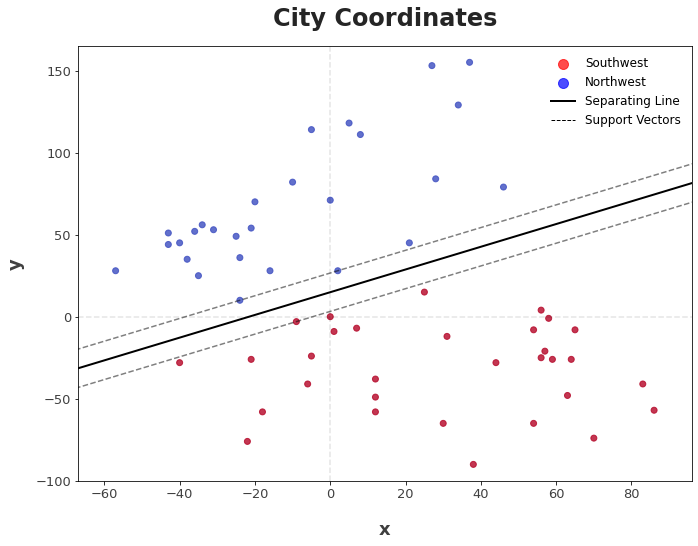

In [453]:

fig, ax = plt.subplots(figsize=(11, 8))
plt.xlim(min(data['x']) - 10, max(data['x']) + 10)
plt.ylim(min(data['y']) - 10, max(data['y']) + 10)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.1)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.1)
plt.xlabel('x', fontsize=18, fontweight='bold', color='black', alpha=0.75, labelpad=20)
plt.ylabel('y', fontsize=18, fontweight='bold', color='black', alpha=0.75, labelpad=10)
plt.title('City Coordinates', fontsize=24, fontweight='bold', color='black', alpha=0.85, pad=20)
plt.xticks(fontsize=13, color='black', alpha=0.75)
plt.yticks(fontsize=13, color='black', alpha=0.75)
plt.scatter([], [], c='red', alpha=0.7, s=100, label='Southwest')
plt.scatter([], [], c='blue', alpha=0.7, s=100, label='Northwest')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, fontsize=12)
plt.scatter(data['x'], data['y'], c=data['class'], cmap='coolwarm', alpha=0.8)
plt.plot(x, separation_line_up, 'k--', alpha=0.5)
plt.plot(x, separation_line_down, 'k--', alpha=0.5)
plt.plot(x, separation_line, linewidth=2, color='black')
plt.plot([], [], color='black', linewidth=2, label='Separating Line')
plt.plot([], [], color='black', linewidth=1, linestyle='--', label='Support Vectors')
plt.legend(loc='upper right', frameon=False, fontsize=12)
plt.show()


### 2.3

The coordinate of the city Giessen is ($0, 22$). Determine if Giessen is in the cluster NW or the cluster SE.

In [454]:

prediction = model.predict([[0, 22]])   # Predict the class of the new city

print(prediction.item())    # Print the prediction class (1 or 2)


1


### Answer:

Giessen is in the cluster NW.

---